# N-gram Language Models

- Character Level Language Models -> Character Level Tokenizer 
- Word Level Language Models -> ...
- Phoneme Level Language Models -> ...
- Subword Level Language Models -> ...
- Bytelevel Language Models -> ...

In [12]:
# Bigram language model -> given a single character, simply predict the next character using a lookup table of counts based on a dataset that represents a target language

# read words from file
words = open('./english_verbs.txt', 'r').read().splitlines()

In [13]:
# print first 10 verbs of dataset
words[:10]

['abide',
 'accelerate',
 'accept',
 'accomplish',
 'achieve',
 'acquire',
 'acted',
 'activate',
 'adapt',
 'add']

In [14]:
# how many words do we have?
print(len(words))

# what is the shortest word?
print(min(len(word) for word in words))

# what is the longest word?
print(max(len(word) for word in words))

1041
2
13


In [54]:
# which characters follow each other?

bigram_dict = {}

for word in words: 
    word_characters = ['<_>'] + list(word) + ['<_>'] # create a list of all characters we have seen so far
    for character_1, character_2, in zip(word_characters, word_characters[1:]): # zip aligns 2 lists => zip/[a,b,c],[d,e,f]) -> [(a,d), (b,e), (c,f)] -> zip(smile, mile) -> [(s,m), (m,i), ...], zip halts once one list is finished
        #print(character_1, character_2)
        bigram = (character_1, character_2)
        bigram_dict[bigram] = bigram_dict.get(bigram, 0) + 1 # -> if bigram_dict at the bigram position is empty -> fill it with zero, else add 1 

# get the statistics of the entire dataset
#print(bigram_dict)
# get the most frequent bigrams
print(sorted(bigram_dict.items(), key = lambda key_value_pair: -key_value_pair[1])) # sort always sorts increasingly -> to sort from top to bottom -> sort backwards by returning -key_value_pair[1]

[(('e', '<_>'), 353), (('<_>', 's'), 167), (('t', '<_>'), 150), (('r', 'e'), 143), (('t', 'e'), 121), (('i', 'n'), 104), (('<_>', 'c'), 91), (('a', 't'), 84), (('s', 't'), 83), (('<_>', 'p'), 83), (('e', 'r'), 81), (('d', '<_>'), 79), (('<_>', 'r'), 73), (('s', 'e'), 71), (('e', 'a'), 65), (('r', 'a'), 63), (('<_>', 'b'), 63), (('v', 'e'), 62), (('<_>', 'd'), 62), (('l', 'e'), 60), (('c', 'o'), 58), (('<_>', 'a'), 57), (('a', 'r'), 56), (('<_>', 't'), 56), (('n', '<_>'), 55), (('e', 'n'), 55), (('r', '<_>'), 54), (('d', 'e'), 53), (('y', '<_>'), 53), (('i', 's'), 50), (('a', 'n'), 50), (('r', 'i'), 50), (('k', '<_>'), 50), (('p', 'r'), 49), (('<_>', 'f'), 49), (('e', 's'), 48), (('o', 'r'), 48), (('h', '<_>'), 47), (('t', 'r'), 47), (('l', 'i'), 46), (('n', 'd'), 45), (('l', '<_>'), 45), (('<_>', 'm'), 45), (('<_>', 'w'), 44), (('n', 't'), 43), (('r', 'o'), 43), (('c', 'h'), 41), (('p', '<_>'), 41), (('<_>', 'e'), 41), (('<_>', 'i'), 41), (('c', 'e'), 40), (('i', 't'), 39), (('p', 'e')

In [55]:
# store count statistics in a tensor for efficient compute
import torch

# count characters
dataset_characters = []
for word in words:
    word_characters = list(word)
    dataset_characters.extend(word_characters)
distinct_characters = sorted(list(set(dataset_characters)))
print(len(distinct_characters))
print(distinct_characters)

special_characters = ['<_>']

# ngram characters = distinct characters + start token and end token -> + 2
num_characters = len(distinct_characters) + len(special_characters)
print(num_characters)

# create a bigram matrix with rows = characters, columns = follow up characters
bigram_matrix = torch.zeros((num_characters,num_characters), dtype=torch.int32) # we want to represent counts -> use integer, -> there are 26 characters in latin alphabet/roman alphabet LOWER CASED + start/end token, we could also figured that out by a character count ...
print(bigram_matrix)

# create a character to index mapping because it is easier to work with indices when using tensor matrices -> every character gets assigned an index
character_to_index_map = {character:index for index, character in enumerate(distinct_characters)}
print(character_to_index_map)

# add our special characters that symbolize start and end of a word
character_to_index_map['<_>'] = 26
print(character_to_index_map)

# redo the character counting again but map to indices, not to characters
bigram_dict = {}

for word in words: 
    word_characters = ['<_>'] + list(word) + ['<_>'] # create a list of all characters we have seen so far
    for character_1, character_2, in zip(word_characters, word_characters[1:]): # zip aligns 2 lists => zip/[a,b,c],[d,e,f]) -> [(a,d), (b,e), (c,f)] -> zip(smile, mile) -> [(s,m), (m,i), ...], zip halts once one list is finished
        index_1 = character_to_index_map[character_1]
        index_2 = character_to_index_map[character_2]
        bigram_matrix[index_1, index_2] += 1
        
print(bigram_matrix)

26
['a', 'b', 'c', 'd', 'e', 'f', 'g', 'h', 'i', 'j', 'k', 'l', 'm', 'n', 'o', 'p', 'q', 'r', 's', 't', 'u', 'v', 'w', 'x', 'y', 'z']
27
tensor([[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
         0, 0, 0],
        [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
         0, 0, 0],
        [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
         0, 0, 0],
        [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
         0, 0, 0],
        [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
         0, 0, 0],
        [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
         0, 0, 0],
        [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
         0, 0, 0],
        [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
         0, 0, 0],
        [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 

{0: 'a', 1: 'b', 2: 'c', 3: 'd', 4: 'e', 5: 'f', 6: 'g', 7: 'h', 8: 'i', 9: 'j', 10: 'k', 11: 'l', 12: 'm', 13: 'n', 14: 'o', 15: 'p', 16: 'q', 17: 'r', 18: 's', 19: 't', 20: 'u', 21: 'v', 22: 'w', 23: 'x', 24: 'y', 25: 'z', 26: '<_>'}


(-0.5, 26.5, 26.5, -0.5)

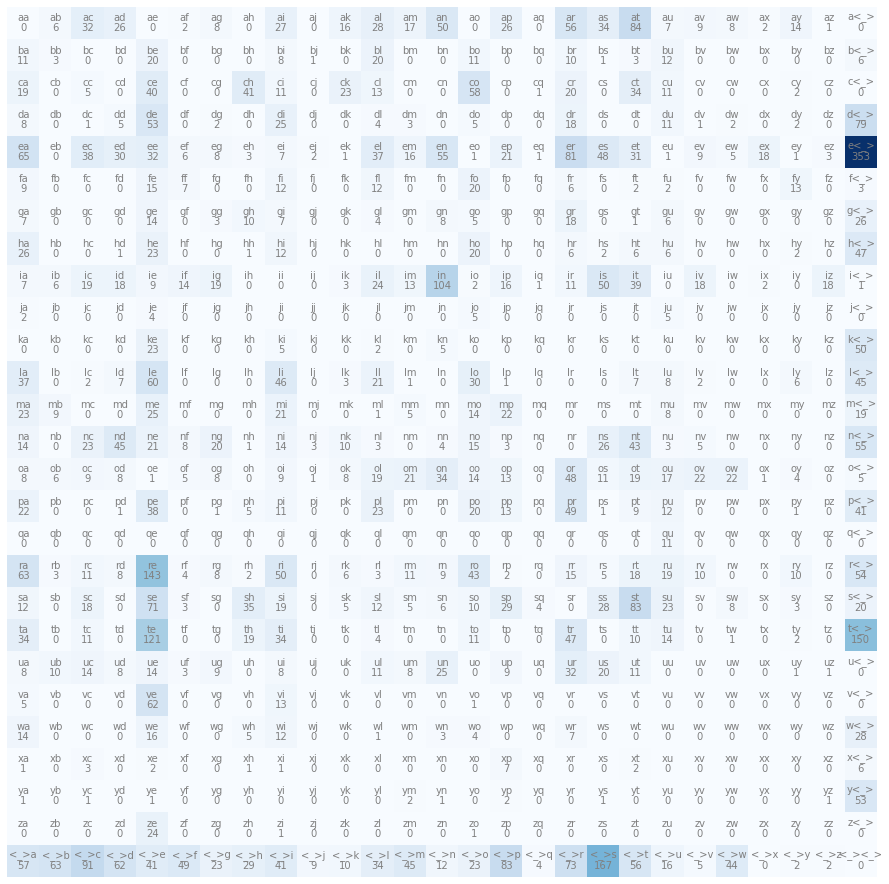

In [57]:
# visualize the bigram matrix
import matplotlib.pyplot as plt
%matplotlib inline

# raw print of bigram_matrix
#plt.imshow(bigram_matrix)

# write characters into the cells to make it look more nicely
index_to_character_map = {index:character for character, index in character_to_index_map.items()}
print(index_to_character_map)

plt.figure(figsize=(16,16))
plt.imshow(bigram_matrix, cmap='Blues')
for iindex in range(num_characters):
    for jindex in range(num_characters):
        bigram_string = index_to_character_map[iindex] + index_to_character_map[jindex]
        plt.text(jindex, iindex, bigram_string, ha='center', va='bottom', color='gray') # write the bigram in top of cell
        plt.text(jindex, iindex, bigram_matrix[iindex, jindex].item(), ha='center', va='top', color='gray' ) # write the bigram count in bottom of cell
plt.axis('off')

In [61]:
# get the probability distribution for the first character of a word

# plot the raw counts
print(bigram_matrix[26])

# turn counts into probabilities
row_probabilities = bigram_matrix[26].float() #  turn ints into floats for floating point arithmetics
row_probabilities = row_probabilities / row_probabilities.sum() # divide every entry in the row by the sum of the row
print(row_probabilities)
print(sum(row_probabilities))

tensor([ 57,  63,  91,  62,  41,  49,  23,  29,  41,   9,  10,  34,  45,  12,
         23,  83,   4,  73, 167,  56,  16,   5,  44,   0,   2,   2,   0],
       dtype=torch.int32)
tensor([0.0548, 0.0605, 0.0874, 0.0596, 0.0394, 0.0471, 0.0221, 0.0279, 0.0394,
        0.0086, 0.0096, 0.0327, 0.0432, 0.0115, 0.0221, 0.0797, 0.0038, 0.0701,
        0.1604, 0.0538, 0.0154, 0.0048, 0.0423, 0.0000, 0.0019, 0.0019, 0.0000])
tensor(1.0000)


In [77]:
# sample from a probability distribution -> use torch.multinomial function which samples WITH putting back the sample to the pool
probs = torch.rand(3)
probs = probs / probs.sum()
print(probs)

sample_indices_list = torch.multinomial(probs, num_samples=20, replacement=True) 
print(sample_indices_list)

# now use our row_probabilities to sample the first character of a word
character_index = torch.multinomial(row_probabilities, num_samples=1, replacement=True).item()  # .item gets out the integers from the tensor
print(character_index)
# turn indices back into characters
character = index_to_character_map[character_index]
print(character)

tensor([0.2335, 0.4489, 0.3176])
tensor([2, 2, 2, 1, 2, 1, 2, 1, 0, 0, 2, 1, 0, 2, 2, 0, 1, 2, 1, 1])
25
z


In [101]:
# SAMPLING: now we use the character that we have sampled to go on and sample the next character from the row distribution of that character and so on ...

output_list = []
character_index = 26 # we always start with the blank/empty word
while True:
    probs = bigram_matrix[character_index].float() # turn counts to floats for divide arithmetics
    probs = probs / probs.sum() # normalize row to probabilities
    character_index = torch.multinomial(probs, num_samples=1, replacement=True).item() # draw a single sample from this row distribution
    if character_index == 26: # if we sample a blank/empty word -> stop the sampling process
        break
    else:
        character = index_to_character_map[character_index]
        output_list.append(character)

''.join(output_list)

'ound'

In [124]:
# OPTIMIZATION -> turn the bigram matrix into a probability matrix
prob_matrix = bigram_matrix.float()
prob_matrix /= prob_matrix.sum(1, keepdim=True) # divide by row sum
#print(prob_matrix)

output_list = []
character_index = 26 # we always start with the blank/empty word
while True:
    probs = prob_matrix[character_index]
    # SANITY CHECK: compare to uniform distribution
    #probs = torch.ones(num_characters).float()
    #probs /= probs.sum()
    character_index = torch.multinomial(probs, num_samples=1, replacement=True).item() # draw a single sample from this row distribution
    if character_index == 26: # if we sample a blank/empty word -> stop the sampling process
        break
    else:
        character = index_to_character_map[character_index]
        output_list.append(character)

''.join(output_list)

'le'

# Projects

In [ ]:
# Datasets

# DATA SOURCES: Which datasets are out there? Which data sources do we have? : the pile: https://pile.eleuther.ai/, red pajama: https://github.com/togethercomputer/RedPajama-Data

# DATASET SIZE: 
## What dataset size do we need for training? (Chinchilla Paper: https://arxiv.org/abs/2203.15556)
## What dataset size do we need for fine tuning? 

# DATA ACQUISITION: 
# How do we get HIGH QUALITY data? Which data acquisition options do we have?
## human acquisition, crowdsourcing (open assistant approach: https://arxiv.org/abs/2304.07327)
## gpt-4 like generation/llm generation (self instruct paper: https://arxiv.org/abs/2212.10560)
## ? 

# DATA QUALITY VALIDATION: 
# How can we validate/check our data quality=?
# How can we do that visually? -> https://home.nomic.ai/, sbert visualization, ...

---

In [ ]:
# Models

# Which models are out there? => https://lifearchitect.ai/models/
## Llama: https://research.facebook.com/publications/llama-open-and-efficient-foundation-language-models/
## StableLM: https://stability.ai/blog/stability-ai-launches-the-first-of-its-stablelm-suite-of-language-models
## Cerebras-GPT: https://www.cerebras.net/blog/cerebras-gpt-a-family-of-open-compute-efficient-large-language-models/

# TRAINING: Training? is that even possible? ->https://arxiv.org/abs/2304.03208

# FINE TUNING: Fine Tuning? 
## Normal Fine Tuning, up to which size does that make sense? on which hardware?
##-> Parameter Efficient Fine Tuning: https://github.com/huggingface/peft, https://www.youtube.com/watch?v=KoOlcX3XLd4&t=3084s, 

# IN CONTEXT LEARNING/PROMPTING: = ICL (In context learning, few shot learning
## Which prompt templates are out there? -> LangChain: https://github.com/hwchase17/langchain, Hugging GPT: https://arxiv.org/abs/2303.17580, ChameleonLM: https://arxiv.org/abs/2304.09842, 

# OPTIMIZATION: How can we make that stuff running on consumer hardware?
## Quantization: https://huggingface.co/blog/bloom-inference-pytorch-scripts, https://huggingface.co/docs/accelerate/usage_guides/big_modeling
## (Compute Graph Optimization): https://www.youtube.com/watch?v=_AKFDOnrZz8&t=812s
## Inference Frameworks: ONNX, Ctranslate, .cpp: https://onnx.ai/

---

In [ ]:
# Deployment

# SERVICES: Which services do we need? -> Docker Service Architecture, Streamlit, Gradio, FastAPI, BentoML ...: mlops: https://www.wandb.courses/courses/take/effective-mlops-model-development/lessons/40025747-welcome-to-the-course, https://neptune.ai/blog/best-practices-docker-for-machine-learning 

# SCALING: How can we scale our architecture? -> Kubernetes, Singularity, ..., : https://www.seldon.io/deploying-machine-learning-models-on-kubernetes

# USER MANAGEMENT: How can we serve multiple customers/users at the same time? 
## How is a streaming API build?  

# HARDWARE MANAGEMENT: how do we share hardware (gpus, tpus, ...) between machines? 

# FRONTEND DEPLOYMENT: ONNX -> graph optimization + quanitisieren -> deployen (react, javascript, web, flutter, ...)